<a href="https://colab.research.google.com/github/namratachaudhary/ucd-machine-learning/blob/main/UCDPA_Unit_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset - https://www.kaggle.com/datasets/nabihazahid/spotify-dataset-for-churn-analysis

In [53]:
from google.colab import files
files.upload()

Saving spotify_churn_dataset.csv to spotify_churn_dataset (1).csv


{'spotify_churn_dataset (1).csv': b'user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned\r\n1,Female,54,CA,Free,26,23,0.2,Desktop,31,0,1\r\n2,Other,33,DE,Family,141,62,0.34,Web,0,1,0\r\n3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1\r\n4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0\r\n5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1\r\n6,Female,17,AU,Free,219,35,0.46,Desktop,13,0,0\r\n7,Female,39,UK,Premium,289,44,0.38,Desktop,0,1,0\r\n8,Female,41,UK,Free,210,68,0.11,Mobile,5,0,0\r\n9,Other,55,DE,Student,50,66,0.29,Web,0,1,0\r\n10,Male,44,DE,Free,278,94,0.38,Mobile,44,0,0\r\n11,Other,33,DE,Free,86,44,0.11,Web,37,0,0\r\n12,Other,24,CA,Free,113,24,0.56,Desktop,39,0,1\r\n13,Female,37,IN,Family,24,86,0.11,Desktop,0,1,0\r\n14,Female,53,US,Premium,45,47,0.6,Web,0,1,0\r\n15,Other,37,IN,Family,114,13,0.44,Web,0,1,1\r\n16,Male,25,FR,Student,230,25,0.26,Desktop,0,1,0\r\n17,Female,36,DE,Student,181,93,

In [54]:
import pandas as pd
spotify_data = pd.read_csv("spotify_churn_dataset.csv")

In [55]:
spotify_data.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [56]:
spotify_data.groupby(["device_type"]).count()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
device_type,,,,,,,,,,,
Desktop,2778,2778,2778,2778,2778,2778,2778,2778,2778,2778,2778
Mobile,2599,2599,2599,2599,2599,2599,2599,2599,2599,2599,2599
Web,2623,2623,2623,2623,2623,2623,2623,2623,2623,2623,2623


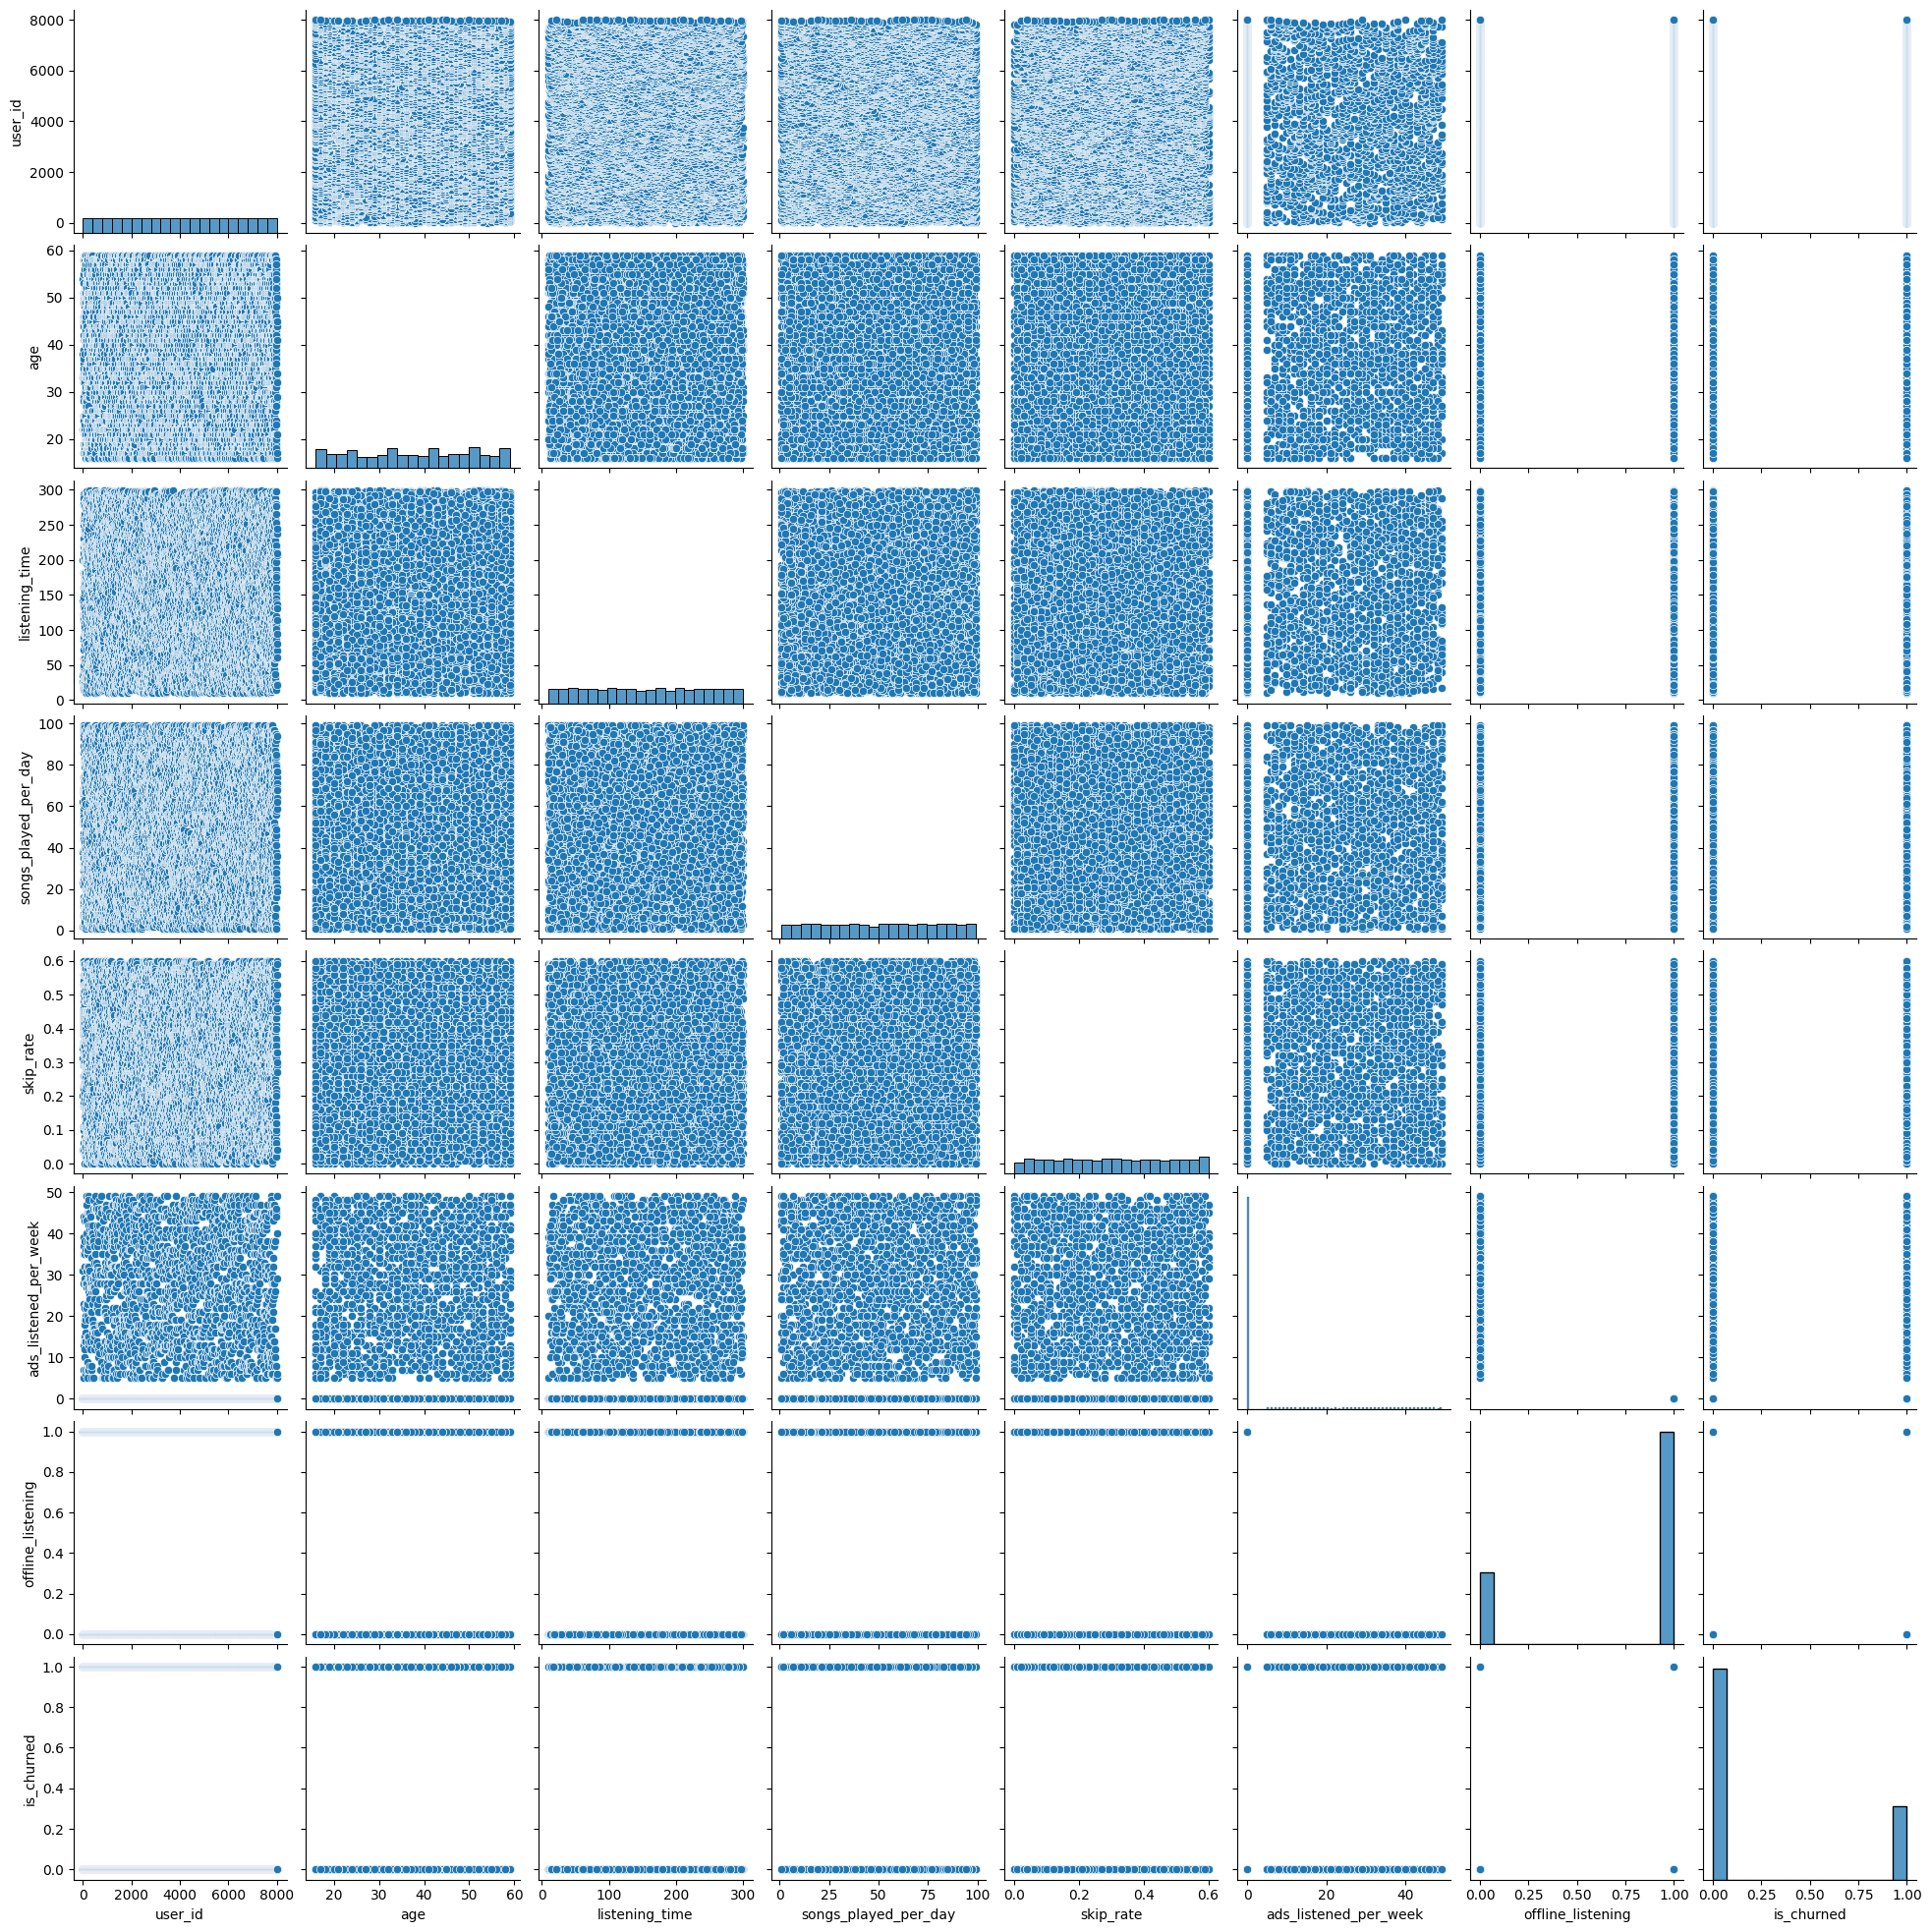

In [57]:
import seaborn as sns

sns.pairplot(spotify_data)

In [58]:
X = spotify_data.drop(columns=["user_id", "is_churned"])
y = spotify_data["is_churned"]

In [59]:
X

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening
0,Female,54,CA,Free,26,23,0.20,Desktop,31,0
1,Other,33,DE,Family,141,62,0.34,Web,0,1
2,Male,38,AU,Premium,199,38,0.04,Mobile,0,1
3,Female,22,CA,Student,36,2,0.31,Mobile,0,1
4,Other,29,US,Family,250,57,0.36,Mobile,0,1
...,...,...,...,...,...,...,...,...,...,...
7995,Other,44,DE,Student,237,36,0.30,Mobile,0,1
7996,Male,34,AU,Premium,61,64,0.59,Mobile,0,1
7997,Female,17,US,Free,81,62,0.33,Desktop,5,0
7998,Female,34,IN,Student,245,94,0.27,Desktop,0,1


In [60]:
y

,is_churned
0,1
1,0
2,1
3,0
4,1
...,...
7995,1
7996,0
7997,0
7998,0


In [61]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

# Preprocessor (encode categoricals)
X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=16)

Model Development

In [62]:
# import the class
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=2000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

coef_df = pd.DataFrame(model.coef_, columns = X_encoded.columns)
coef_df['intercept'] = model.intercept_
print(coef_df)

       age  listening_time  songs_played_per_day  skip_rate  \
0  0.00044       -0.000265              0.001384   0.208231   

   ads_listened_per_week  offline_listening  gender_Male  gender_Other  \
0               0.005398          -0.229445    -0.071309     -0.012166   

   country_CA  country_DE  ...  country_IN  country_PK  country_UK  \
0   -0.073217    0.114414  ...    0.006857    0.018444   -0.032399   

   country_US  subscription_type_Free  subscription_type_Premium  \
0    0.007154                -0.49238                  -0.053819   

   subscription_type_Student  device_type_Mobile  device_type_Web  intercept  
0                  -0.040285            0.006786        -0.048072  -0.841417  

[1 rows x 21 columns]


Model Evaluation using Confusion Matrix

In [63]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix

array([[1497,    0],
       [ 503,    0]])

In [64]:
model_score = model.score(X_test, y_test)
print(model_score)

0.7485
